![](https://logos-download.com/wp-content/uploads/2016/11/Y_Combinator_logo_text_wordmark.png)

# Predict companies' performance - Part 2/2

[Y-Combinator](https://www.ycombinator.com/) is one of the most famous incubator in the world. A lot of enormous licorn like: 
 
* [Dropbox](https://www.dropbox.com/) 
* [Airbnb](https://www.airbnb.com/) 
* [Coinbase](https://www.coinbase.com/) 
* [Stripe](https://stripe.com/) 
* [Zapier](https://zapier.com/)


Now that we have successfully done your linear regression, open a new notebook and try to do, this time, a multiple linear regression on `50_Startups.csv` dataset.

## Step 1 - Import Data 🤹‍♀️

- Import usual librairies

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np 
import seaborn as sns




In [26]:
import sklearn
sklearn.__version__

'1.3.0'

- Import `50_Startups.csv` dataset

In [27]:
df = pd.read_csv("../99-assets/ML/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Step 2 - EDA 📊

- Visualize the relationship between `Marketing Spend` and `Profit`

<Axes: xlabel='[Marketing Spend]', ylabel='[Profit]'>

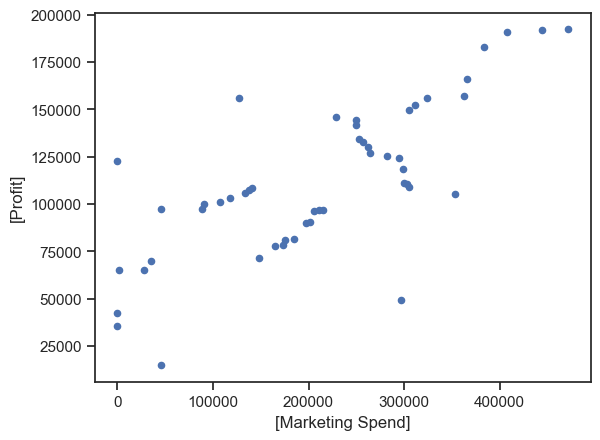

In [28]:
df.plot.scatter(["Marketing Spend"], ["Profit"])
#plt.scatter(df.iloc[:,2], df.iloc[:,4])

- Now visualize `R&D Spend` with `Profit`

<Axes: xlabel='[R&D Spend]', ylabel='[Profit]'>

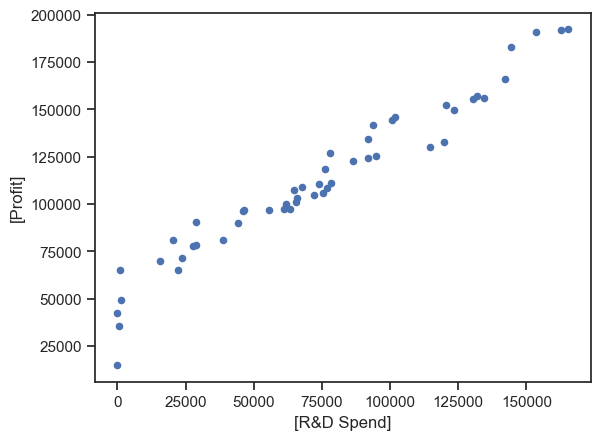

In [29]:
df.plot.scatter(["R&D Spend"], ["Profit"])

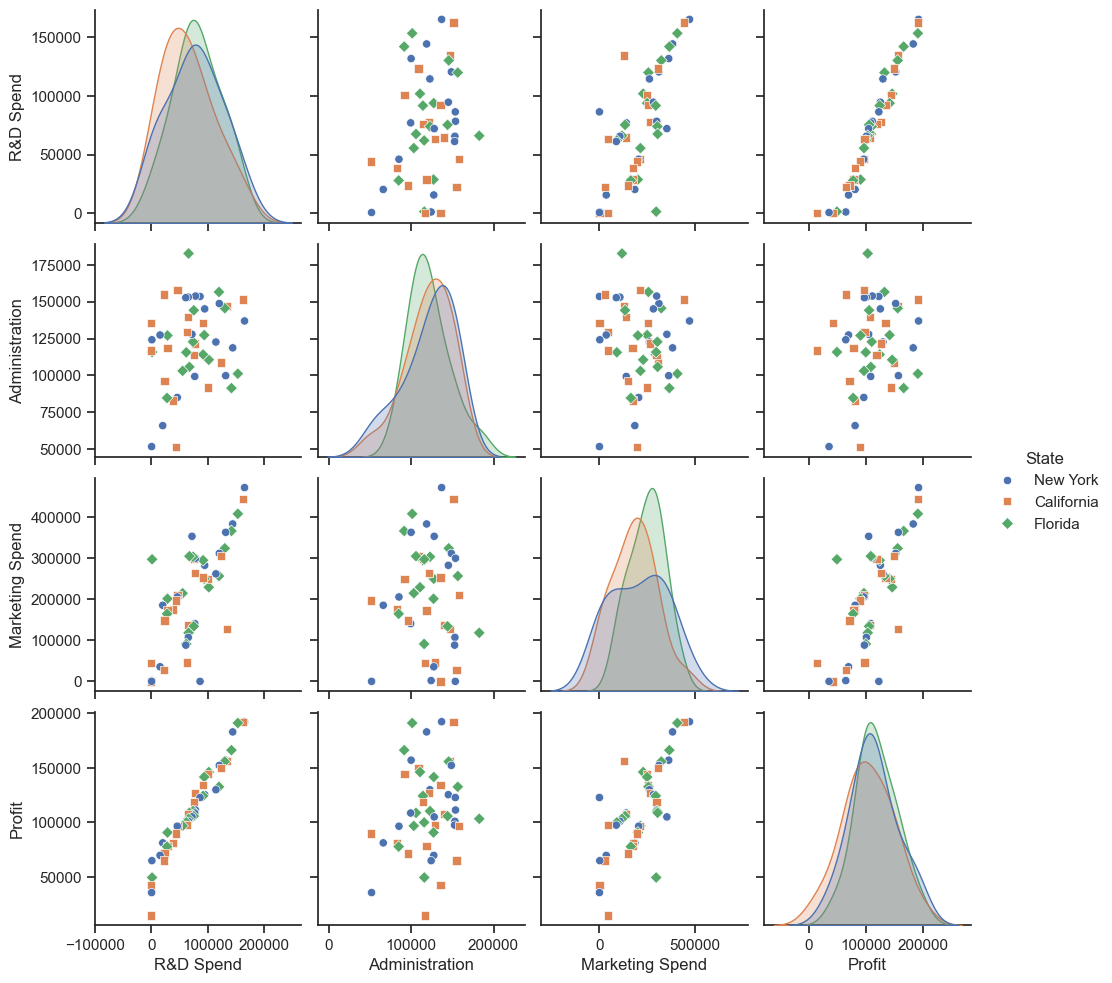

In [30]:
sns.set(style="ticks")
sns.pairplot(df, hue="State", markers=["o", "s", "D"])

* Show your dataset's main statistics

In [31]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,New York,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


* Check if you see any missing values 

In [32]:
df.isna().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [33]:
df.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [34]:
df.isna().sum() / len(df) * 100

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

## Step 3 - Preprocessing 🍳

- Split your dataset by $X$ and $y$

In [35]:
# X il attend une matrice 2D
# y il attend un vecteur 1D

feature_list = ["R&D Spend", "Administration", "Marketing Spend", "State"] 
X = df.loc[:, feature_list]

y = df.loc[:, "Profit"]


- Split your data in train and test sets

In [36]:
# pas de stratify 
# Si stratify = y       # Allows you to stratify your sample. 
                        # Meaning, you will have the same
                        # proportion of categories in test 
                        # and train set

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)


In [37]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


- Make all the required preprocessings on the train set

In [38]:
print(X_train[:5])

numeric_features = [0, 1, 2 ]
numeric_transformer = StandardScaler()                               # moyenne 0 et ecart type à 1

categorical_features = [3]
#categorical_transformer = OneHotEncoder(drop='first') # Pour virer l'Angleterre comme dans l'exemple ci-dessus on aurait mis drop="last" mais ça n'existe pas
categorical_transformer = OneHotEncoder()


feature_encoder = ColumnTransformer(                                 # ColumnTransformer provient du module compose
    transformers=[

      # Attention il semble que l'ordre compte. 
      ('cat', categorical_transformer, categorical_features),
      ('num', numeric_transformer, numeric_features)

      # ('num', numeric_transformer, numeric_features),
      # ('cat', categorical_transformer, categorical_features)
    ]

)

X_train = feature_encoder.fit_transform(X_train)
print(X_train[:5].round(3))


    R&D Spend  Administration  Marketing Spend       State
33   55493.95       103057.49        214634.81     Florida
35   46014.02        85047.44        205517.64    New York
26   75328.87       144135.98        134050.07     Florida
34   46426.07       157693.92        210797.67  California
18   91749.16       114175.79        294919.57     Florida
[[ 0.     1.     0.    -0.35  -0.785  0.101]
 [ 0.     0.     1.    -0.555 -1.481  0.027]
 [ 0.     1.     0.     0.079  0.801 -0.552]
 [ 1.     0.     0.    -0.546  1.325  0.07 ]
 [ 0.     1.     0.     0.435 -0.356  0.751]]


## Build your model 🏋️‍♂️

- Create and fit your model

In [39]:
# Train model
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !


LinearRegression()

- Make predictions on train set

In [40]:
y_train_pred = regressor.predict(X_train)
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)


[ 95764.42320496  89164.62849777 109506.72329085  91366.2188941
 127111.48666646]


- Make predictions on test set (make sure you apply the same preprocessings as before!)

In [41]:
X_test = feature_encoder.transform(X_test)
print(X_test[:5].round(3))

y_test_pred = regressor.predict(X_test)
print(y_test_pred[:5].round(3))

[[ 0.     1.     0.    -0.121  2.289 -0.68 ]
 [ 1.     0.     0.     0.628 -1.221  0.386]
 [ 0.     1.     0.     0.655 -0.494  0.219]
 [ 0.     1.     0.    -0.948 -1.494 -0.305]
 [ 0.     1.     0.     1.77  -0.859  1.667]]
[103015.202 132582.278 132447.738  71976.099 178537.482]


### Prédiction sur un jeu de valeurs en particulier

In [48]:
           
Bob = {
  "R&D Spend"       : [55_493],
  "Administration"  : [103_057], 
  "Marketing Spend" : [214_634],
  "State"           : ["Florida"]
}

Zoubida = pd.DataFrame(Bob)
Zoubida = feature_encoder.transform(Zoubida)  # ! pas oublier les transform
ProfitAttendu = regressor.predict(Zoubida)
print("Profit = ", *ProfitAttendu.round(3))

Profit =  95763.643


- Let's see scores of your model on train and test set.

In [49]:
# C'est bien X_test et y_test. 
# score() n'a pas besoin de y_test_pred car il peut les recalculer 
# Il a déjà en mémoire les 'a' et 'b' dont il a besoin print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set     : ", regressor.score(X_test, y_test).round(3))

R2 score on test set     :  0.935


- What do you think about it ?

>Very small overfitting. We can consider our model performant!

## Bonus - Feature Importance 🏄‍♂️

* Now harder, try to visualize the coefficients of your model and therefore deduce a feature importance ranking

In [44]:
# C'est juste pour montrer comment on retrouve la liste des noms des features du ou des OneHotEncoder

# On accède aux transformers du ColumnTransformer feature_encoder
print("All transformers are           : ", *feature_encoder.transformers_)

# On accède au OneHotEncoder
print("One Hot Encoder transformer is : ", feature_encoder.transformers_[0][1])

# On accède aux catégories du OneHotEncoder
# Une liste de 1 ou plusieurs tableaux
# Ici il y a 1 jeu de valeurs dans 1 tableau
print("One Hot Encoder categories are : ", *feature_encoder.transformers_[0][1].categories_)

All transformers are           :  ('cat', OneHotEncoder(), [3]) ('num', StandardScaler(), [0, 1, 2])
One Hot Encoder transformer is :  OneHotEncoder()
One Hot Encoder categories are :  ['California' 'Florida' 'New York']


In [53]:
# On veut construire un dataframe avec 
# une colonne pour les noms des features 
# une colonne avec les valeurs des coefs associés

# On utilise concatenate car il peut y avoir un ou plusieurs tableaux dans la liste feature_encoder.transformers_[0][1].categories_
categorical_column_names = np.concatenate(feature_encoder.transformers_[0][1].categories_)

# numeric_features = une liste avec les indices des colonnes numériques
# .columns retourne le nom des colonnes 
numerical_column_names   = X.iloc[:, numeric_features].columns                   
all_column_names = np.append(categorical_column_names, numerical_column_names)

feature_importance = pd.DataFrame({
    "feature_names" : all_column_names,
    "coefficients"  : regressor.coef_.squeeze()
})
print(feature_importance.round(3), "\n")
print(f"Constant is           {regressor.intercept_:.3f}\n")



     feature_names  coefficients
0       California        86.638
1          Florida      -872.646
2         New York       786.007
3        R&D Spend     35726.288
4   Administration       851.302
5  Marketing Spend      4519.883 

Constant is           109354.851



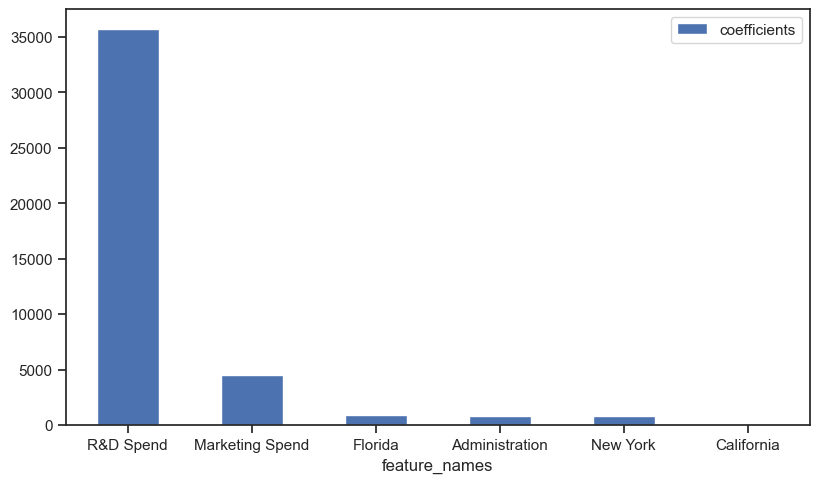

In [46]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()
feature_importance.sort_values(by="coefficients", ascending=False).plot(kind="bar", x="feature_names", figsize=(16*.6, 9*.6))
_ = plt.xticks(rotation=0)

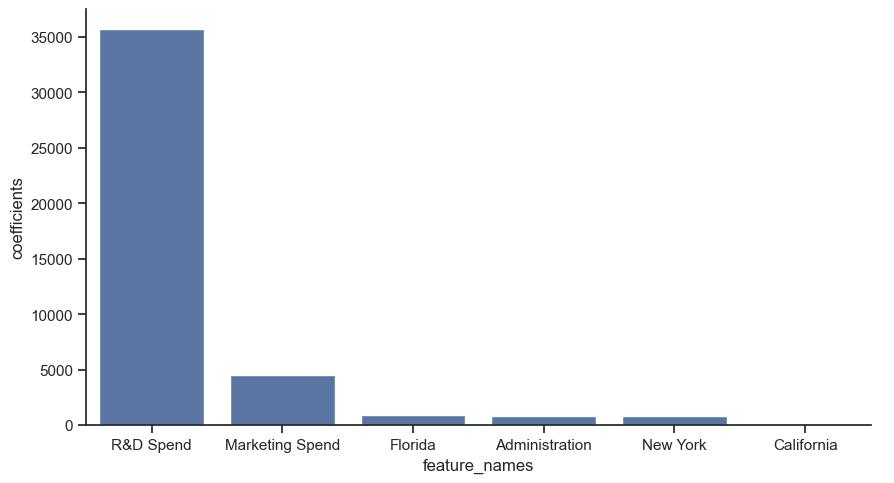

In [47]:
sns.catplot(feature_importance.sort_values(by="coefficients", ascending=False), 
            x="feature_names", 
            y="coefficients", 
            kind="bar",
            aspect=16/9);

R&D Spend compte 7 fois plus que le marketing.